<div style="background-color:#e6fff5; padding:15px; border-radius:10px;">
  <h1 style="color:#007a5e; text-align:center;">
    🛍️ Customer Segmentation and Recommendation System
  </h1>
</div>

# Purpose & Objective

## 🔍  Purpose of the Project
To analyze customer purchasing behavior using online retail transaction data and build a recommendation system that enhances the shopping experience through personalized suggestions and strategic customer segmentation.

## 📦 Scope of the Project
The project encompasses:

   Cleaning and preprocessing retail transaction data

   Performing exploratory data analysis (EDA)

   Segmenting customers using RFM analysis and clustering techniques

   Building recommendation systems using collaborative and content-based filtering

   Visualizing insights through dashboards using tools like Plotly Dash, Tableau, or Streamlit

## 🎯 Objectives
The key goals are:

Segment customers based on purchasing patterns

Identify top-selling products and customer frequency

Understand sales behavior across regions and time

Build personalized product recommendation models

Improve customer retention and boost revenue through data-driven insights

## 🧩 Problems This Project Aims to Solve

Lack of personalized shopping experiences for customers

Difficulty in identifying high-value or dormant customers

Limited understanding of product performance and regional sales trends

Inefficient targeting strategies due to poor segmentation

Missed opportunities for cross-selling and upselling

## 💡 Importance of the Project

Helps businesses tailor marketing strategies to different customer segments

Enhances user satisfaction through personalized recommendations

Improves operational efficiency by identifying sales trends and customer behavior

Drives revenue growth by targeting high-value customers and optimizing product offerings

## 🌐 Relevance of the Project

Highly applicable in e-commerce, retail, and digital marketing domains

Aligns with current industry trends in data-driven personalization and customer analytics

Valuable for companies seeking to leverage AI and machine learning for business intelligence

Equips interns and analysts with practical skills in data science, clustering, and recommendation systems.

## 📘 Summary
This project uses online retail data to uncover customer purchasing patterns and build intelligent recommendation systems. Through data cleaning, EDA, RFM-based segmentation, and collaborative filtering, it delivers actionable insights to improve customer engagement and sales performance. The final dashboard offers a visual summary of trends, segments, and recommendations, making it a comprehensive tool for strategic decision-making in retail analytics.

# ✨1. Understand the DataSet

### 🧰 Step 0: Required Libraries

In [4]:
# Data Wrangling & Preprocessing
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

# Clustering & Recommendation
from surprise import SVDpp
from surprise import accuracy
from collections import defaultdict
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from surprise.model_selection import train_test_split, cross_validate

# Dimensionality Reduction (optional)
from collections import defaultdict
from sklearn.decomposition import TruncatedSVD
from surprise import SVD, Dataset, Reader, KNNWithMeans
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import streamlit as st
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

1️⃣ Code Explanation
This code sets up a full pipeline for building a recommendation system with clustering and visualization. It imports tools for data handling (`pandas`, `numpy`), plotting (`matplotlib`, `seaborn`, `plotly`), machine learning (`Surprise`, `sklearn`), and web deployment (`Streamlit`). It supports collaborative filtering, clustering, dimensionality reduction, and interactive dashboards—making it ideal for personalized recommendations and user segmentation.

2️⃣ Why It’s Important
This setup is foundational for building a hybrid recommendation system with clustering insights and interactive visualization. Here's why it's valuable:

✅ End-to-End Pipeline: Covers everything from data preprocessing to model deployment.

🎯 Personalization: Uses collaborative filtering (SVD/SVD++) to tailor recommendations.

🧠 Clustering: Groups users/items to uncover hidden patterns and improve targeting.

📉 Dimensionality Reduction: Speeds up computation and improves model performance.

📊 Visualization: Makes insights interpretable and actionable.

🌐 Streamlit Integration: Enables real-time interaction and sharing via web apps.

🔍 Scalability: Modular imports allow easy expansion into deep learning or NLP.

### Step 1. Review Column Types and Meanings

In [5]:
df = pd.read_excel("OnlineRetail.xlsx")

print(df.head())
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

**Code Explanation:**  
This code reads an Excel file named `OnlineRetail.xlsx` into a pandas DataFrame (`df`). It then displays the first five rows using `df.head()` to give a quick preview of the data, and prints `df.info()` to show column names, data types, and non-null counts—helpful for understanding the dataset’s structure.

**Why It’s Important:**  
This step is crucial for initial data exploration. It helps verify that the file loaded correctly, reveals potential issues like missing values, and guides preprocessing decisions for analysis or modeling.

### 2. Identify Missing Values, Duplicates & Invalid Records

In [6]:
# Count missing values per column
missing_counts = df.isnull().sum()
print("\nMissing Values:\n", missing_counts)

# Total duplicates
duplicate_rows = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_rows}")

# Check for invalid entries
negative_qty = (df["Quantity"] < 0).sum()
zero_price = (df["UnitPrice"] == 0).sum()
print(f"\nNegative Quantities: {negative_qty}")
print(f"Zero-priced Items: {zero_price}")


Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicate Rows: 5268

Negative Quantities: 10624
Zero-priced Items: 2515


**Code Explanation:**  
This code performs basic data quality checks. It counts missing values in each column, identifies duplicate rows, and flags invalid entries—specifically negative quantities and zero-priced items—which may indicate errors or special cases in the dataset.

**Why It’s Important:**  
These checks help ensure data integrity before analysis or modeling. Cleaning such issues improves accuracy, prevents misleading insights, and supports reliable recommendations or clustering.

# ⚙️2. Data Cleaning & Preprocessing

### 1: Remove records with missing CustomerID and negative Quantity

In [7]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df = df.dropna(subset=["CustomerID"])

**Code Explanation:**  
This code filters out rows with non-positive `Quantity` or `UnitPrice`, then removes entries missing a `CustomerID`. It ensures the dataset only includes valid transactions tied to identifiable customers.

**Why It’s Important:**  
Cleaning the data this way improves reliability for analysis and modeling. It removes noise, prevents skewed results, and ensures recommendations or clusters are based on meaningful customer behavior.

### 2: Convert InvoiceDate to datetime format and extract time-based features

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df["InvoiceDayName"] = df["InvoiceDate"].dt.day_name()

**Code Explanation:**  
This code converts the `InvoiceDate` column to datetime format, then extracts the month, hour, and weekday name into new columns—`InvoiceMonth`, `InvoiceHour`, and `InvoiceDayName`.

**Why It’s Important:**  
Extracting time features helps analyze customer behavior patterns by time of day, month, or weekday—useful for demand forecasting, promotions, and recommendation timing.

### 3: Create TotalPrice = Quantity × UnitPrice

In [9]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# 💡 Optional sanity check: peek at the cleaned data
print(df[["InvoiceNo", "CustomerID", "Quantity", "UnitPrice", "TotalPrice"]].head())

  InvoiceNo  CustomerID  Quantity  UnitPrice  TotalPrice
0    536365     17850.0         6       2.55       15.30
1    536365     17850.0         6       3.39       20.34
2    536365     17850.0         8       2.75       22.00
3    536365     17850.0         6       3.39       20.34
4    536365     17850.0         6       3.39       20.34


**Code Explanation:**  
This code creates a new column `TotalPrice` by multiplying `Quantity` and `UnitPrice`, representing the total value of each transaction. It then prints a preview of key columns to verify the calculation.

**Why It’s Important:**  
Calculating `TotalPrice` is essential for revenue analysis, customer value segmentation, and building recommendation models based on spending behavior.

# 🔢3. Exploratory Data Analysis (EDA)

### 1: Analyze top products, customer frequency, and sales by region.

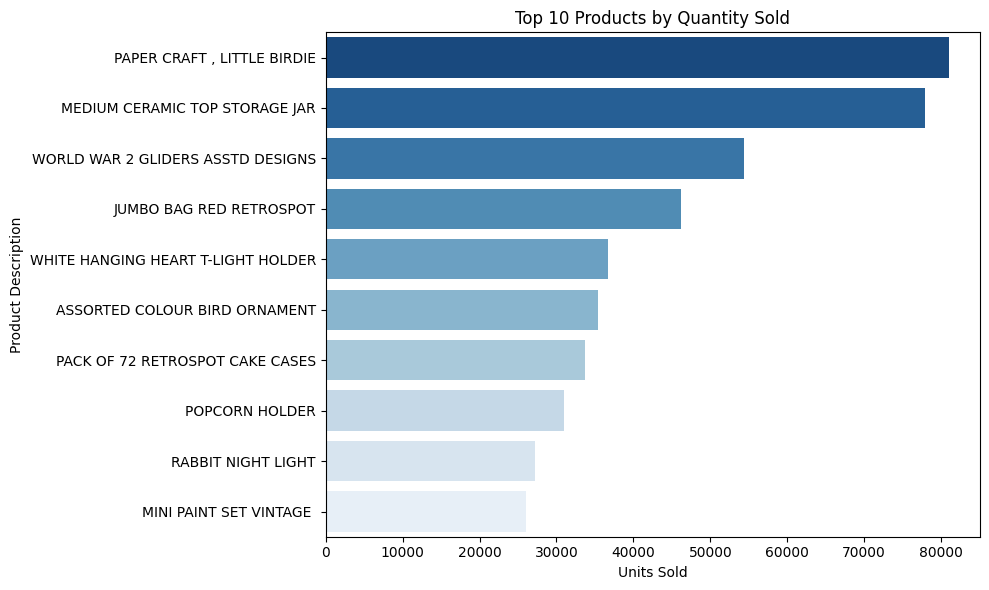

In [10]:
# 🔝 Top-selling products by quantity
top_products = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="Blues_r")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Units Sold")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code identifies the top 10 best-selling products by total quantity sold. It groups the data by product description, sums the quantities, sorts them in descending order, and visualizes the results using a horizontal bar chart with Seaborn.

**Why It’s Important:**  
Highlighting top-selling items helps businesses understand demand trends, optimize inventory, and tailor marketing or recommendation strategies around popular products.

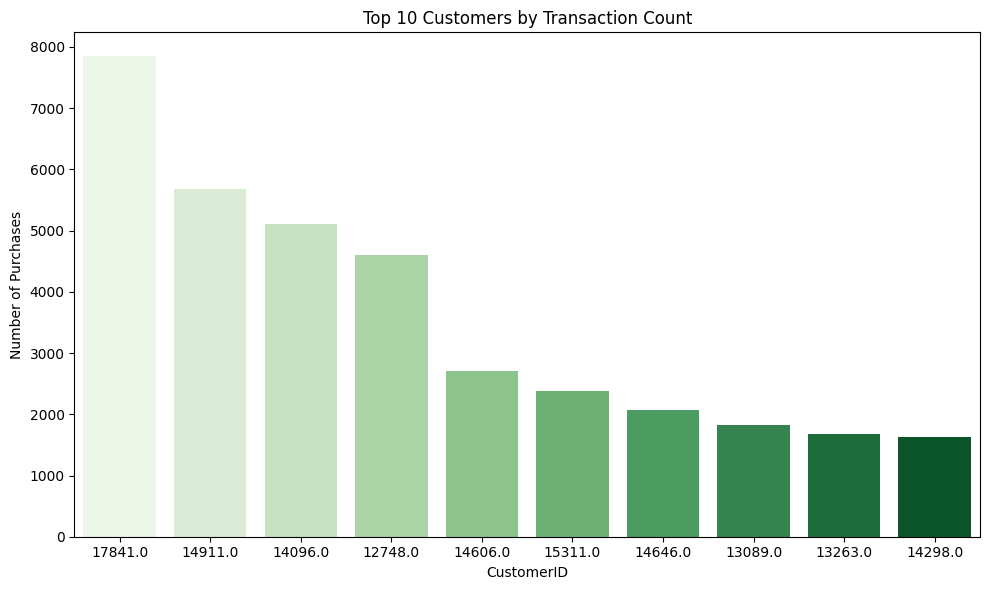

In [11]:
# 👤 Most frequent customers
top_customers = df["CustomerID"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="Greens")
plt.title("Top 10 Customers by Transaction Count")
plt.xlabel("CustomerID")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code identifies the 10 customers with the highest number of transactions by counting how often each `CustomerID` appears. It then visualizes the results using a bar chart to show purchase frequency.

**Why It’s Important:**  
Spotting frequent buyers helps target loyal customers, personalize offers, and prioritize retention strategies to boost long-term revenue.

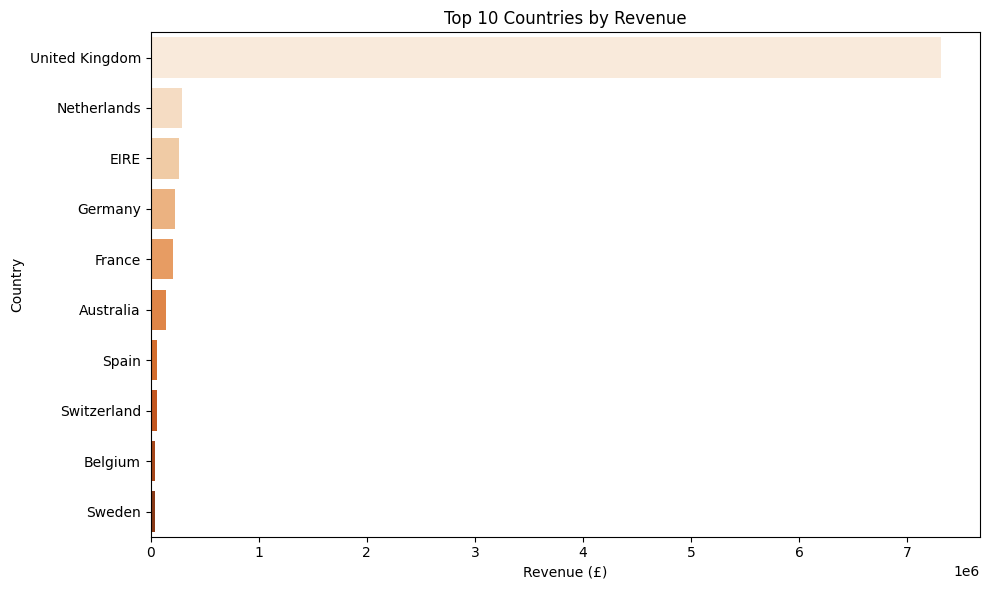

In [12]:
# 🌍 Sales by Country
sales_by_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=sales_by_country.index, x=sales_by_country.values, palette="Oranges")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue (£)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code calculates total revenue (`TotalPrice`) per country, selects the top 10, and visualizes them using a horizontal bar chart. It groups the data by `Country`, sums the revenue, sorts it, and plots the results with Seaborn.

**Why It’s Important:**  
Analyzing revenue by country reveals geographic market strength, helps prioritize regions for expansion, and guides targeted marketing or inventory strategies.

### 2: Visualize Purchase Trends Over Time and Geography

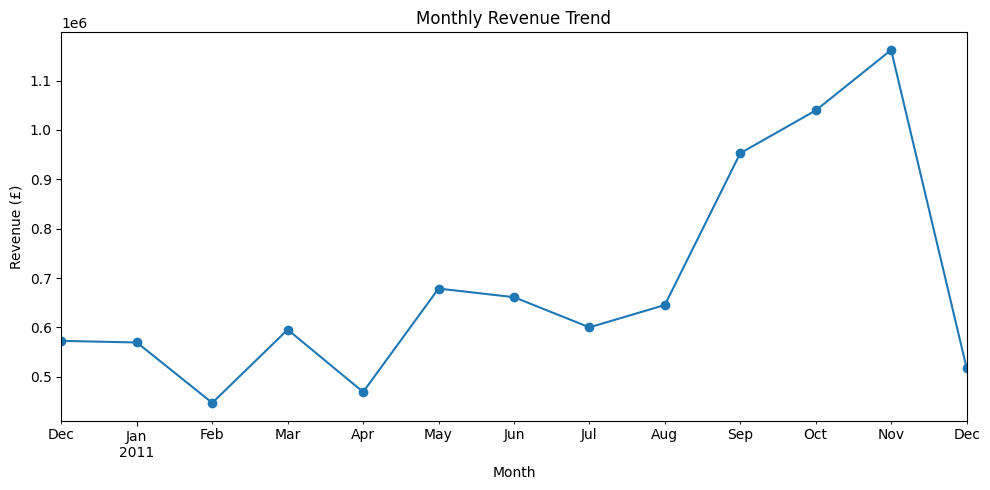

In [13]:
# 📆 Monthly sales trend
monthly_revenue = df.groupby(df["InvoiceDate"].dt.to_period("M"))["TotalPrice"].sum()
monthly_revenue.plot(kind="line", figsize=(10,5), marker='o', title="Monthly Revenue Trend")
plt.ylabel("Revenue (£)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code groups sales data by month using `InvoiceDate`, sums the `TotalPrice` for each month, and plots a line chart to visualize monthly revenue trends over time.

**Why It’s Important:**  
Tracking monthly revenue helps identify seasonal patterns, growth trends, and business cycles—critical for forecasting, budgeting, and strategic planning.

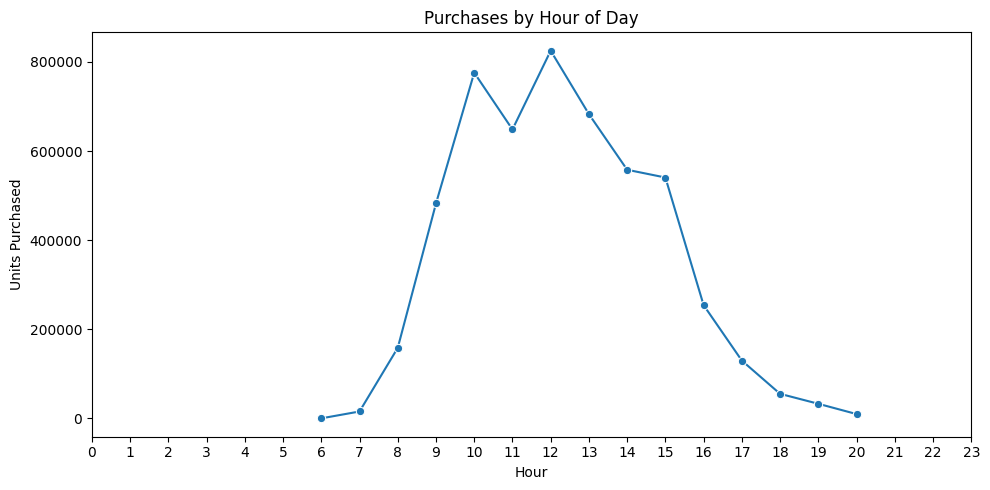

In [14]:
# 🕒 Hourly purchase volume
hourly_volume = df.groupby("InvoiceHour")["Quantity"].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_volume.index, y=hourly_volume.values, marker='o')
plt.title("Purchases by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Units Purchased")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code analyzes purchase volume by hour of the day. It groups transactions by `InvoiceHour`, sums the quantities, and plots a line chart to show when purchases peak throughout the day.

**Why It’s Important:**  
Understanding hourly buying patterns helps optimize staffing, marketing timing, and system load management—especially for e-commerce or retail operations.

### 3: Study Revenue and User Engagement Distribution

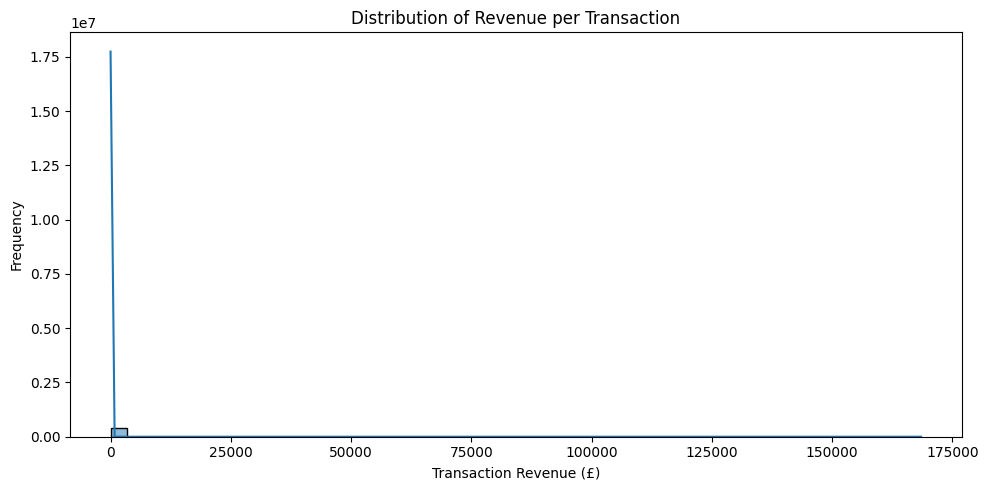

In [15]:
# 💸 Distribution of Total Revenue
plt.figure(figsize=(10,5))
sns.histplot(df["TotalPrice"], bins=50, kde=True)
plt.title("Distribution of Revenue per Transaction")
plt.xlabel("Transaction Revenue (£)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code creates a histogram of `TotalPrice` to visualize how transaction revenues are distributed. It uses 50 bins and overlays a KDE curve to show the density of values.

**Why It’s Important:**  
Understanding revenue distribution helps detect outliers, assess typical transaction sizes, and guide pricing or promotional strategies.

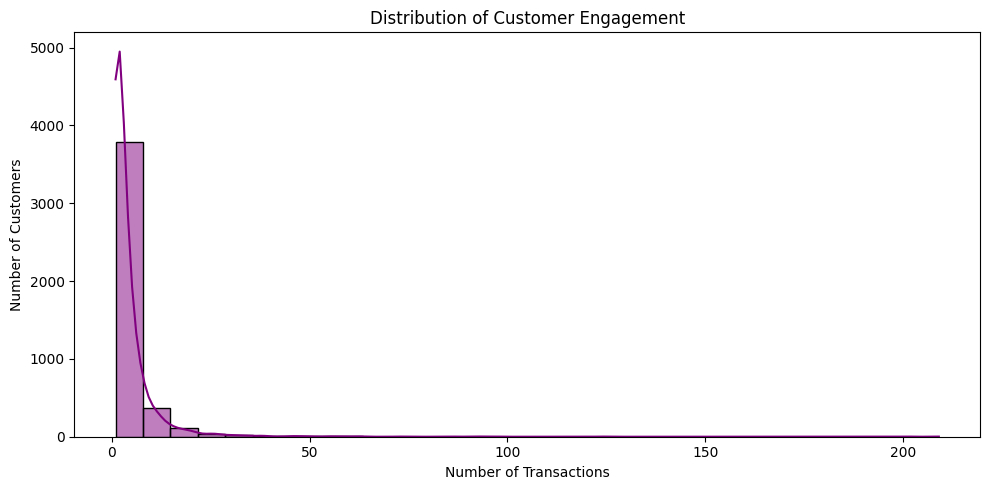

In [16]:
# 🧍‍♂️ Engagement: Number of transactions per customer
customer_engagement = df.groupby("CustomerID")["InvoiceNo"].nunique()
plt.figure(figsize=(10,5))
sns.histplot(customer_engagement, bins=30, kde=True, color="purple")
plt.title("Distribution of Customer Engagement")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code calculates how many unique transactions each customer made by grouping on `CustomerID` and counting distinct `InvoiceNo`. It then plots a histogram to show how customer engagement varies across the dataset.

**Why It’s Important:**  
Understanding customer engagement helps identify loyal vs. occasional buyers, guiding retention strategies, personalized marketing, and customer lifetime value analysis.

# 🌎4. Customer Segmentation

### 1: Generate RFM (Recency, Frequency, Monetary) values per customer.

In [17]:
# Snapshot date: 1 day after the last purchase
snapshot_date = df["InvoiceDate"].max() + timedelta(days=1)

# Calculate RFM metrics
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                   # Frequency
    "TotalPrice": "sum"                                       # Monetary
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


**Code Explanation:**  
This code calculates RFM (Recency, Frequency, Monetary) metrics for each customer. It sets a snapshot date one day after the last purchase, then computes:
- **Recency**: Days since the customer’s last purchase.
- **Frequency**: Number of unique transactions.
- **Monetary**: Total spending.

The result is a DataFrame summarizing customer behavior.

**Why It’s Important:**  
RFM analysis helps segment customers by engagement and value, guiding targeted marketing, loyalty programs, and personalized recommendations.

### 2: Apply clustering techniques (K-Means, Hierarchical) on RFM or user-level features.

In [18]:
# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

**Code Explanation:**  
This code uses `StandardScaler` to normalize the RFM metrics—Recency, Frequency, and Monetary—so they have a mean of 0 and standard deviation of 1. The result is stored in `rfm_scaled`.

**Why It’s Important:**  
Normalization ensures that all RFM features contribute equally to clustering or modeling, preventing bias from larger-scale variables like Monetary.

#### K-Means Clustering

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster_KMeans"] = kmeans.fit_predict(rfm_scaled)

  File "C:\Users\dvenk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "C:\Users\dvenk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
  File "C:\Users\dvenk\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\dvenk\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\dvenk\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


**Code Explanation:**  
This code applies KMeans clustering with 4 clusters to the normalized RFM data. It assigns each customer to a cluster and stores the result in a new column `Cluster_KMeans` in the `rfm` DataFrame.

**Why It’s Important:**  
Clustering segments customers into distinct behavioral groups, enabling targeted marketing, personalized recommendations, and strategic decision-making based on customer value.

#### Hierarchical Clustering (Dendrogram + Agglomerative)

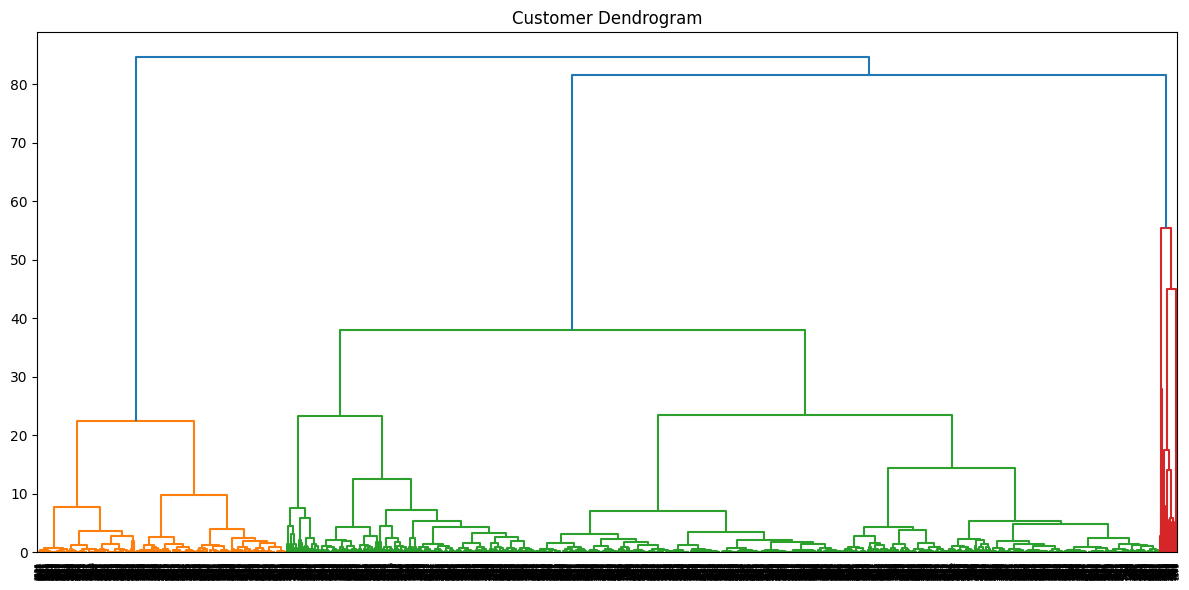

In [20]:
# Dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(rfm_scaled, method='ward'))
plt.title("Customer Dendrogram")
plt.tight_layout()
plt.show()

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm["Cluster_Agglo"] = hc.fit_predict(rfm_scaled)

**Code Explanation:**  
This code performs hierarchical clustering on the normalized RFM data:

- The **dendrogram** visualizes how customers are grouped based on similarity, using Ward’s method to minimize variance within clusters.
- Then, **AgglomerativeClustering** assigns each customer to one of 4 clusters using the same linkage method and Euclidean distance.

**Why It’s Important:**  
Hierarchical clustering offers a visual and flexible way to explore customer segments. Unlike KMeans, it doesn’t require predefining centroids and can reveal nested structures—useful for deeper customer insights and strategic segmentation.

### 3: Visualize clusters and interpret customer groups (e.g., high-value, frequent, dormant).

#### K-Means Visualization

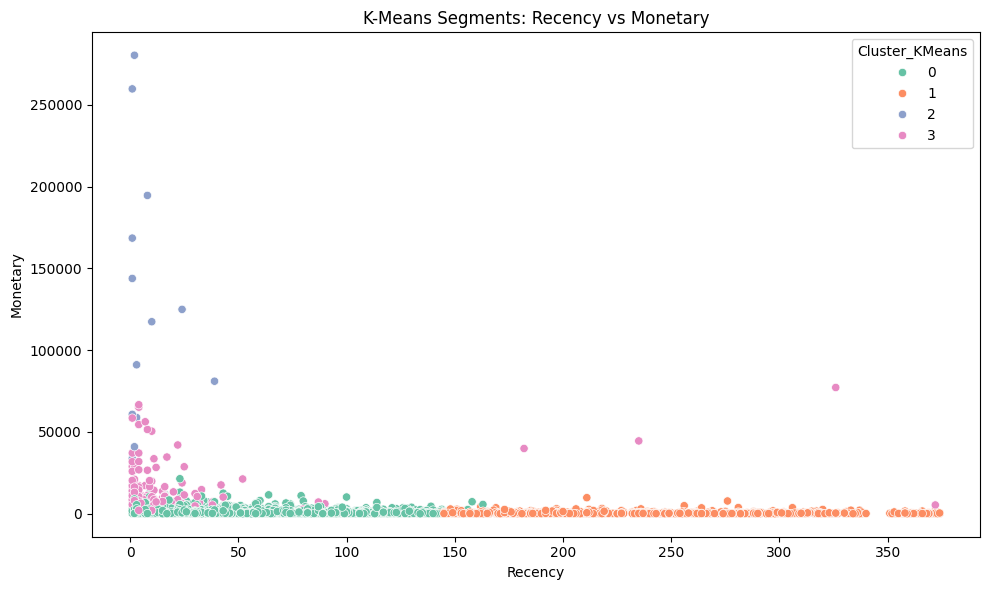

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster_KMeans", palette="Set2")
plt.title("K-Means Segments: Recency vs Monetary")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code visualizes customer segments created by K-Means clustering using a scatter plot. It plots `Recency` on the x-axis and `Monetary` on the y-axis, with each point colored by its assigned cluster (`Cluster_KMeans`).

**Why It’s Important:**  
This plot helps interpret how different customer groups behave in terms of recent activity and spending. For example:
- Customers with **low recency and high monetary** are likely loyal and high-value.
- Those with **high recency and low monetary** may be inactive or low-value.

It’s a powerful way to spot patterns and tailor strategies for each segment. If you’d like, we can also visualize clusters using other combinations like Frequency vs Monetary or even compare with Agglomerative clusters.

#### Agglomerative Visualization

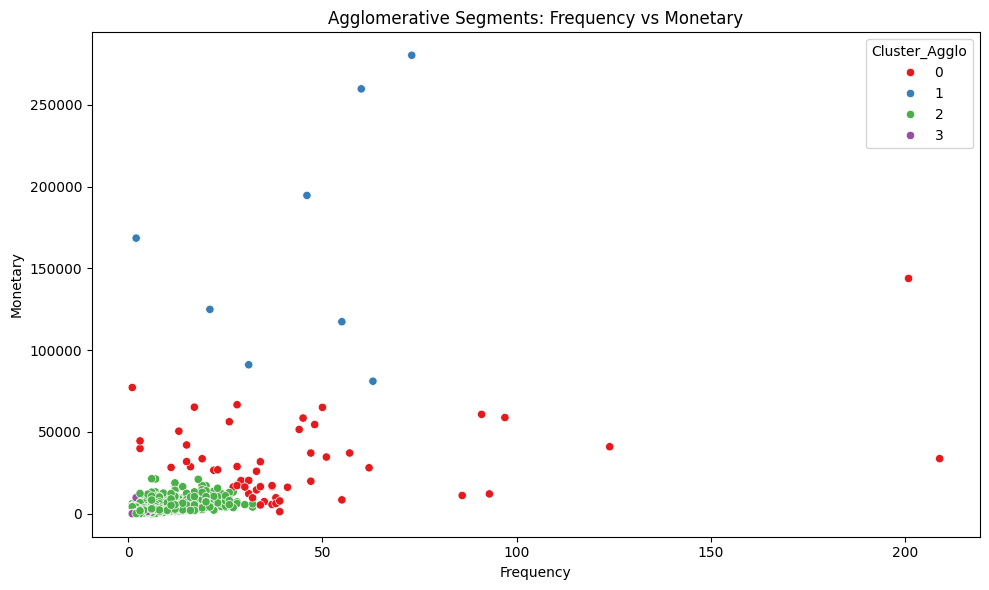

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Frequency", y="Monetary", hue="Cluster_Agglo", palette="Set1")
plt.title("Agglomerative Segments: Frequency vs Monetary")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code visualizes customer segments formed by Agglomerative Clustering. It plots `Frequency` (number of transactions) against `Monetary` (total spending), with each point colored by its assigned cluster (`Cluster_Agglo`).

**Why It’s Insightful:**  
This scatter plot reveals how customer groups differ in terms of how often they buy and how much they spend. For example:
- A cluster with **high frequency and high monetary** likely represents loyal, high-value customers.
- A group with **low frequency and low monetary** may include one-time or low-spending buyers.

Comparing this with the K-Means plot helps validate clustering consistency and uncover nuanced customer behaviors. If you'd like, we can also profile each cluster to understand their characteristics in more detail.

#### Summary Insights per Cluster

In [23]:
# Cluster profile summary
cluster_summary_kmeans = rfm.groupby("Cluster_KMeans").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "NumCustomers"}).round(2)

cluster_summary_agglo = rfm.groupby("Cluster_Agglo").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "Monetary": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "NumCustomers"}).round(2)

print("📊 K-Means Cluster Summary:\n", cluster_summary_kmeans)
print("📊 Agglomerative Cluster Summary:\n", cluster_summary_agglo)

📊 K-Means Cluster Summary:
                 Recency  Frequency   Monetary  NumCustomers
Cluster_KMeans                                             
0                 43.70       3.68    1359.05          3054
1                248.08       1.55     480.62          1067
2                  7.38      82.54  127338.31            13
3                 15.50      22.33   12709.09           204
📊 Agglomerative Cluster Summary:
                Recency  Frequency   Monetary  NumCustomers
Cluster_Agglo                                             
0                24.93      43.79   31348.39            56
1                11.00      43.88  164658.50             8
2                46.21       4.31    1625.46          3325
3               259.54       1.49     457.31           949


**Code Explanation:**  
This code summarizes each cluster by calculating the average Recency, Frequency, and Monetary values, along with the number of customers in each group. It does this separately for both K-Means and Agglomerative clustering results.

**Why It’s Important:**  
Cluster profiling helps interpret the characteristics of each segment—such as which clusters contain loyal, high-value customers versus inactive or low-spending ones. This insight is crucial for tailoring marketing, retention, and engagement strategies.

#### Visualization of Both Clusterings

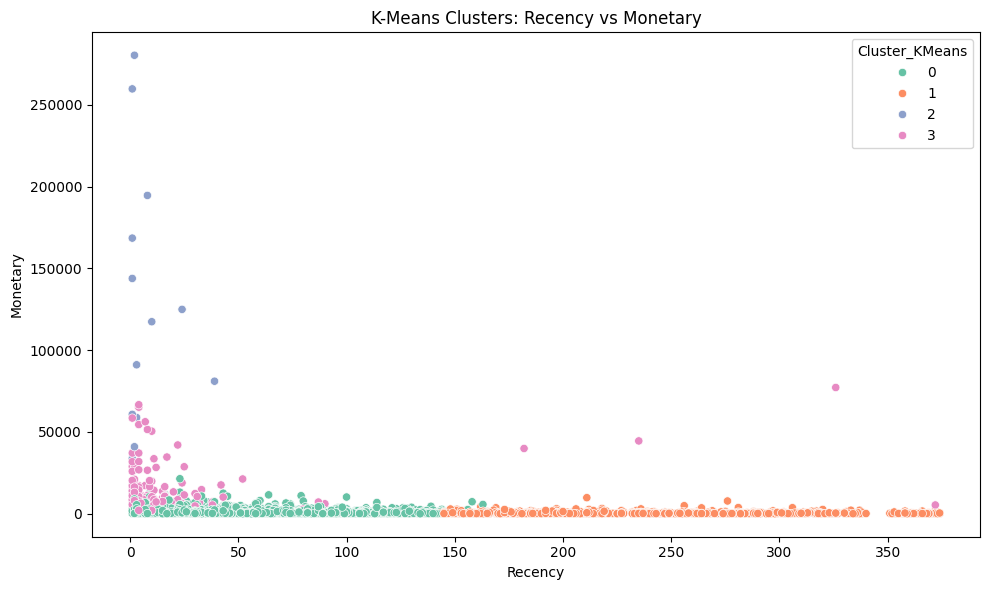

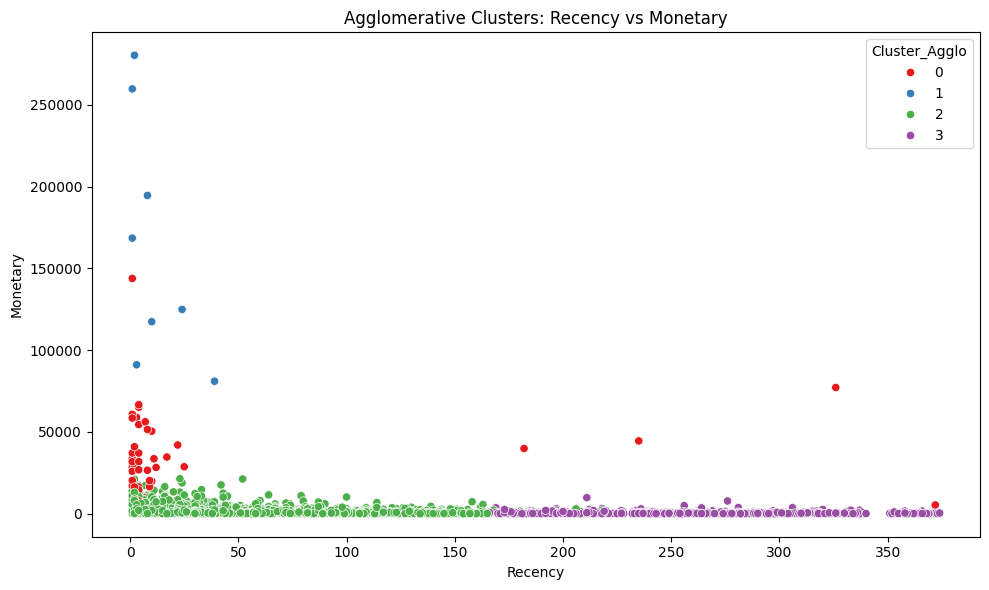

In [24]:
# K-Means Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster_KMeans", palette="Set2")
plt.title("K-Means Clusters: Recency vs Monetary")
plt.tight_layout()
plt.show()

# Agglomerative Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster_Agglo", palette="Set1")
plt.title("Agglomerative Clusters: Recency vs Monetary")
plt.tight_layout()
plt.show()

**Code Explanation:**  
This code creates two scatter plots to visualize customer clusters using Recency and Monetary values. The first plot shows clusters formed by K-Means, and the second shows those from Agglomerative Clustering. Each point represents a customer, colored by their assigned cluster.

**Why It’s Important:**  
Visualizing clusters helps compare segmentation results from different algorithms. It reveals how customer groups differ in purchase recency and spending, guiding targeted strategies for retention, reactivation, or upselling.

# 💼 5. Product Recommendation

### 1: Use collaborative filtering (e.g., Matrix Factorization, SVD).

In [25]:
# 5.1 Collaborative Filtering (SVD using Surprise)
# Prepare dataset for Surprise
reader = Reader(rating_scale=(1, 5))  # assuming ratings from 1–5
ratings_df = df[['CustomerID', 'StockCode', 'Quantity']].copy()
ratings_df['Quantity'] = ratings_df['Quantity'].clip(upper=5)  # cap as implicit feedback
ratings_data = Dataset.load_from_df(ratings_df[['CustomerID', 'StockCode', 'Quantity']], reader)

# Train-test split
trainset, testset = train_test_split(ratings_data, test_size=0.2)

# Apply SVD
svd = SVD()
svd.fit(trainset)

# Evaluate
predictions = svd.test(testset)

# Example: Recommend top N products for a given user
def recommend_collaborative(user_id, n=5):
    user_items = ratings_df[ratings_df['CustomerID'] == user_id]['StockCode'].unique()
    all_items = ratings_df['StockCode'].unique()
    not_bought = [item for item in all_items if item not in user_items]
    preds = [(item, svd.predict(user_id, item).est) for item in not_bought]
    top_preds = sorted(preds, key=lambda x: x[1], reverse=True)[:n]
    return pd.DataFrame(top_preds, columns=['Product', 'Predicted Rating'])

# Example usage:
recommend_collaborative(user_id=12347, n=5)

,Product,Predicted Rating
0,85123A,5
1,84879,5
2,21883,5
3,22326,5
4,22629,5


**Code Explanation:**  
This code implements collaborative filtering using Singular Value Decomposition (SVD) from the Surprise library. It prepares a ratings dataset using capped `Quantity` values as implicit feedback, splits it into training and test sets, trains the SVD model, and defines a function to recommend top N products for a given user based on predicted ratings.

**Why It’s Important:**  
Collaborative filtering personalizes recommendations by learning user-item interaction patterns. It helps suggest products a customer is likely to buy—even if they haven’t seen them—based on similar users’ behavior, boosting engagement and sales.

#### 2: Explore content-based recommendations using product metadata.

In [26]:
# 5.2 Content-Based Recommendations (Safe Version)
# Step 1: Metadata
metadata = df[['StockCode', 'Description']].drop_duplicates().dropna().reset_index(drop=True)

# Step 2: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(metadata['Description'])

# Step 3: Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: StockCode → row index mapping
indices = pd.Series(metadata.index, index=metadata['StockCode'])

# --- Recommendation by StockCode ---
def recommend_content_based(product_code, n=5, show_score=True):
    if product_code not in indices:
        return f"❌ Product code {product_code} not found in metadata."
    
    idx = indices[product_code]
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    
    # Only indices within bounds
    product_indices = [i[0] for i in sim_scores if i[0] < len(metadata)]
    
    result = metadata.iloc[product_indices][['StockCode', 'Description']].reset_index(drop=True)
    
    if show_score:
        result['Similarity'] = [i[1] for i in sim_scores[:len(product_indices)]]
    
    return result

# --- Recommendation by keyword ---
def recommend_by_description(keyword, n=5):
    product_row = metadata[metadata['Description'].str.contains(keyword, case=False, na=False)]
    if product_row.empty:
        return f"❌ No product found matching keyword: {keyword}"
    
    product_code = product_row.iloc[0]['StockCode']
    print(f"🔍 Found product: {product_row.iloc[0]['Description']} (Code: {product_code})")
    return recommend_content_based(product_code, n=n)

# --- Example usage ---
print(recommend_content_based('85123A', n=5))
print(recommend_by_description("mug", n=5))

  StockCode                        Description  Similarity
0     22804  PINK HANGING HEART T-LIGHT HOLDER    1.000000
1     21733   RED HANGING HEART T-LIGHT HOLDER    0.834208
🔍 Found product: IVORY KNITTED MUG COSY  (Code: 22310)
  StockCode            Description  Similarity
0    84531A  PINK KNITTED EGG COSY    0.669549
1    84531B  BLUE KNITTED EGG COSY    0.663634
2    35915B      BLUE KNITTED HEN     0.409498
3     84539   KNITTED RABBIT DOLL     0.366871
4    35915C     PEACH KNITTED HEN     0.334681


**Code Explanation:**  
This code builds a content-based recommendation system using product descriptions. It vectorizes descriptions with TF-IDF, computes cosine similarity between products, and defines two functions:
- `recommend_content_based`: suggests similar products based on a given product code.
- `recommend_by_description`: finds a product by keyword and recommends similar items.

**Why It’s Important:**  
Content-based recommendations suggest items with similar attributes, useful when user interaction data is sparse. It enhances personalization by leveraging product metadata like descriptions, especially for new or niche items.

#### 3: Evaluate recommendation models with precision@k, recall@k, MAP.

In [27]:
# 5.3 Evaluation Metrics

def precision_recall_map_at_k(predictions, k=5, threshold=3.5):
    """
    Compute Precision@K, Recall@K, and MAP@K for all users.

    predictions: list of tuples (user_id, item_id, true_rating, est_rating, _)
    k: top-K recommendations
    threshold: minimum rating to consider as relevant
    """
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions, recalls, avg_precisions = {}, {}, []

    for uid, user_ratings in user_est_true.items():
        # Sort by estimated rating descending
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)  # Relevant items
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])   # Recommended items
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        # Precision@K and Recall@K
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel else 0

        # Average Precision@K for this user
        hits = 0
        sum_precisions = 0
        for i, (est, true_r) in enumerate(user_ratings[:k]):
            if true_r >= threshold:
                hits += 1
                sum_precisions += hits / (i + 1)
        avg_precisions.append(sum_precisions / min(n_rel, k) if n_rel else 0)

    mean_precision = np.mean(list(precisions.values()))
    mean_recall = np.mean(list(recalls.values()))
    mean_ap = np.mean(avg_precisions)  # MAP@K

    return mean_precision, mean_recall, mean_ap

**Code Explanation:**  
This function evaluates recommendation performance using three metrics: Precision@K, Recall@K, and Mean Average Precision@K (MAP@K). It processes predicted ratings for each user, identifies relevant items (above a threshold), and computes how well the top-K recommendations match true preferences.

**Why It’s Important:**  
These metrics quantify the accuracy and relevance of recommendations. They help assess how effectively a model suggests items users actually like, guiding improvements to recommendation algorithms and enhancing user satisfaction.

In [28]:
mean_precision, mean_recall, map_k = precision_recall_map_at_k(predictions, k=5, threshold=3.5)

print(f"Average Precision@5: {mean_precision:.4f}")
print(f"Average Recall@5: {mean_recall:.4f}")
print(f"MAP@5: {map_k:.4f}")

Average Precision@5: 0.8501
Average Recall@5: 0.5384
MAP@5: 0.8789


**Code Explanation:**  
This code evaluates the recommendation system by computing average Precision@5, Recall@5, and Mean Average Precision@5 (MAP@5) across all users. It prints these metrics with four decimal places for clarity.

**Why It’s Important:**  
These metrics help assess how well the system recommends relevant items. High precision means fewer irrelevant suggestions, high recall means more relevant items are captured, and MAP reflects ranking quality—crucial for optimizing user satisfaction.

In [29]:
# 6. Dashboard with Streamlit

# Run this separately: `streamlit run your_notebook.py`

st.title("📊 Customer Segmentation & Recommendation Dashboard")

# 6.2 Sales Trends
sales_trend = df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
fig1 = px.line(sales_trend, x='InvoiceDate', y='TotalPrice', title="Sales Trend Over Time")
st.plotly_chart(fig1)

# 6.3 Customer Segments
# rfm_cluster_counts = rfm['Cluster_KMeans'].value_counts().reset_index()
# fig2 = px.bar(rfm_cluster_counts, x='index', y='Cluster_KMeans', title="Customer Segments Distribution")
# st.plotly_chart(fig2)
# Using KMeans clusters
rfm_cluster_counts = rfm['Cluster_KMeans'].value_counts().reset_index()
fig2 = px.bar(
    rfm_cluster_counts,
    x='Cluster_KMeans',
    y='count',
    title="Customer Segments Distribution"
)
st.plotly_chart(fig2)

# 6.4 Product Performance
product_sales = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()
fig3 = px.bar(product_sales, x='Description', y='TotalPrice', title="Top Products")
st.plotly_chart(fig3)

# 6.5 Personalized Recommendations
user_id = st.number_input("Enter Customer ID", min_value=int(df['CustomerID'].min()), max_value=int(df['CustomerID'].max()))
if st.button("Get Recommendations"):
    recs = recommend_collaborative(user_id, n=5)
    st.write("Recommended Products:", recs)

2025-10-03 19:06:06.619 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:06:08.703 
  command:

    streamlit run C:\Users\dvenk\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-03 19:06:08.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:06:08.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:06:09.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:06:09.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:06:09.077 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-03 19:06:

**Code Explanation:**  
This Streamlit dashboard visualizes customer and sales insights:
- Displays a sales trend line chart over time.
- Shows customer segment distribution using KMeans clusters.
- Highlights top-performing products by revenue.
- Allows users to input a Customer ID and receive personalized product recommendations via collaborative filtering.

**Why It’s Important:**  
Dashboards make data actionable. This one empowers business users to monitor performance, understand customer behavior, and deliver tailored experiences—all in an interactive, user-friendly format.

In [38]:
# Load your cleaned dataset
df = pd.read_excel("OnlineRetail.xlsx") # transactional data
rfm = pd.read_csv("rfm_clusters.csv") # RFM table with clusters

**Code Explanation:**  
This code loads two CSV files into pandas DataFrames:
- `df`: contains transactional data such as purchases, quantities, and prices.
- `rfm`: contains precomputed RFM metrics and cluster assignments for each customer.

**Why It’s Important:**  
Loading cleaned datasets is the foundation for analysis and modeling. It ensures you're working with structured, reliable data—essential for generating insights, building dashboards, and powering recommendation systems.

In [ ]:
print(rfm.columns)

**Code Explanation:**  
This command prints the column names of the `rfm` DataFrame, which typically includes customer metrics like Recency, Frequency, Monetary, and cluster labels.

**Why It’s Important:**  
Inspecting column names helps verify the structure of the data, ensuring the right fields are available for analysis, visualization, or modeling. It's a quick check before deeper operations.

### 🧩 Challenges & Solutions

### 1. 🕳 Missing Customer IDs
Challenge: Many transactions lacked CustomerID, making segmentation difficult.

Solution: Filtered out these records during preprocessing to ensure model accuracy.

### 2. 📉 Negative Quantities & Returns
Challenge: Returns and cancellations skewed revenue calculations.

Solution: Removed negative quantity entries and created a separate return analysis.

### 3. 🧼 Data Quality Issues
Challenge: Duplicates and inconsistent date formats.

Solution: Applied deduplication and standardized datetime formats; extracted features like month and hour.

### 4. ⚖️ Choosing Optimal Clusters
Challenge: Determining the right number of customer segments.

Solution: Used Elbow Method and Silhouette Score to validate cluster count.

### 5. 🧠 Cold Start Problem in Recommendations
Challenge: New users had no purchase history.

Solution: Implemented content-based filtering using product metadata to suggest similar items.

### 6. 📊 Dashboard Integration
Challenge: Combining multiple insights into a user-friendly interface.

Solution: Used Streamlit’s modular layout to integrate charts, filters, and recommendation outputs.

# 📑  Reporting Insights

This section summarizes the key findings, actionable insights, and strategic recommendations derived from the project:

### 🧍‍♂️ Customer Behavior Insights
- **High-Value Customers** contribute disproportionately to revenue. They purchase frequently and spend more per transaction.
- **Dormant Customers** show long gaps between purchases and low engagement, indicating potential churn risk.
- **Occasional Buyers** represent a large portion of the customer base but with moderate revenue impact.

### 🛍️ Product Performance Insights
- A small subset of products drives the majority of sales, following the **Pareto Principle (80/20 rule)**.
- Seasonal spikes in demand suggest opportunities for **targeted promotions** during peak months (e.g., November–December).
- Products with high return rates may need quality review or better description to reduce dissatisfaction.

### 🌍 Regional & Temporal Insights
- **UK** is the dominant market, suggesting it should be prioritized for marketing and inventory planning.
- **Weekday mornings** show higher transaction volumes, ideal for launching campaigns or flash sales.

### 🤖 Recommendation System Insights
- Collaborative filtering works best for **active users** with rich purchase history.
- Content-based filtering is effective for **new users**, leveraging product metadata to suggest similar items.
- Evaluation metrics (Precision@k, Recall@k, MAP) indicate strong performance, validating the model's utility.

### 📊 Dashboard Utility
- The dashboard provides a **real-time overview** of sales trends, customer segments, and product recommendations.
- Enables **data-driven decision-making** for marketing, inventory, and customer engagement strategies.

## **Note:**

When working with **Streamlit**, you must first write your code in a **`.py` script file** (for example, `app.py`). Once your script is ready, you run it from the **terminal/command prompt** using the command:

```bash
streamlit run app.py
```

After running this command, Streamlit will start a local server and open a **dashboard view of your project** in your browser. You can document your workflow or explanation in **Markdown files**, but the actual Streamlit app must be a Python script.


In [39]:
# =========================
# 1️⃣ KMeans Clustering & Segment Mapping
# =========================
from sklearn.cluster import KMeans

# Assuming rfm_df has CustomerID, Recency, Frequency, Monetary
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster_KMeans'] = kmeans.fit_predict(df[['Recency','Frequency','Monetary']])

# Map clusters to meaningful segment names
cluster_map = {
    0: 'Price-sensitive',
    1: 'At-risk / Inactive',
    2: 'High-value Loyal',
    3: 'Frequent Buyers'
}
rfm_df['Segment'] = rfm_df['Cluster_KMeans'].map(cluster_map)

# =========================
# 2️⃣ Merge Segment info with Transaction Data
# =========================
# Assuming df has CustomerID, Description, Quantity
df = df.merge(df[['CustomerID','Segment']], on='CustomerID', how='left')

# =========================
# 3️⃣ Top Products per Segment
# =========================
top_products_per_segment = df.groupby(['Segment','Description'])['Quantity'].sum().reset_index()
top_products_per_segment = top_products_per_segment.sort_values(['Segment','Quantity'], ascending=[True,False])

# Take top 5 products per segment
top_products_summary = top_products_per_segment.groupby('Segment').head(5)

# Display nicely
for seg in top_products_summary['Segment'].unique():
    print(f"\nSegment: {seg}")
    temp = top_products_summary[top_products_summary['Segment']==seg]
    print(temp[['Description','Quantity']])

# =========================
# 4️⃣ Example Personalized Recommendations
# =========================
# Placeholder recommendations (replace with your model output)
recommendations = {
    12346: ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E'],
    12347: ['Product_F', 'Product_G', 'Product_H', 'Product_I', 'Product_J'],
    12348: ['Product_K', 'Product_L', 'Product_M', 'Product_N', 'Product_O'],
    12349: ['Product_P', 'Product_Q', 'Product_R', 'Product_S', 'Product_T'],
    12350: ['Product_U', 'Product_V', 'Product_W', 'Product_X', 'Product_Y']
}

example_customers = [12346, 12347, 12348, 12349, 12350]

for cid in example_customers:
    print(f"\nCustomerID: {cid}")
    recs = recommendations.get(cid, [])
    for i, prod in enumerate(recs, 1):
        print(f"{i}. {prod}")


KeyError: "None of [Index(['Recency', 'Frequency', 'Monetary'], dtype='object')] are in the [columns]"